# Tour de Richmond Park Leaderboard
Now we are ready to do some analysis

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

# Special functions
import HistoricWeather
import AirDensity


leaderboard = pd.read_excel('Leaderboard Tour de Richmond Park.xlsx')
leaderboard.Date = pd.to_datetime(leaderboard.Date)
leaderboard.head()
leaderboard.Speed = leaderboard.Speed.str.split('k').str[0].astype('float64') 
leaderboard.HR = leaderboard.HR.replace('-','NaN')
leaderboard.HR = leaderboard.HR.str.split('b').str[0].astype('float64') 


Pull in historic weather for the dates on the leaderboard

In [13]:
observations = pd.DataFrame()
for d in leaderboard.Date:  
    [y, m, d, h, mi, s, town, country] = [d.year, d.month, d.day, 18, 0, 0, 'london', 'uk']
    OBS = HistoricWeather.weatherObs(d=d, m=m, y=y, h=h, mi=mi, s=s, town=town, country=country)
    observations = observations.append(OBS)

O = observations.copy()

No historic data available for Saturday, 22 August 2009


Correct the pressure for one erroneous observation

In [14]:
observations.Pressure.loc['2011-08-10 18:00:00']=1020



In [15]:
def getAirDensity(obs):
    return AirDensity.rhoCalc(Pressure = obs.Pressure, Temp = obs.Temp, Humidity = obs.Humidity)

observations['AirDensity'] = observations.apply(getAirDensity, axis=1)
observations['ObsDate'] = observations.index - pd.Timedelta(18,unit='h')
observations = observations.reset_index(drop=True)



In [16]:
leaderboard = leaderboard.join(observations)


In [17]:

leaderboard.head(20)

,Rank,Name,Date,Speed,HR,Power,Powermeter,VAM,Time,Humidity,Pressure,Temp,Wind,WindDirn,AirDensity,ObsDate
0,1,Rob Sharland,2015-08-12,46.5,NaN,393.0,Powermeter,-,13:57:00,60.0,1022.0,22.0,12.0,80.0,1.199210,2015-08-12
1,2,richard mason,2016-09-21,46.3,171.0,454.0,NaN,-,14:01:00,68.0,1018.0,20.0,7.0,190.0,1.202621,2016-09-21
2,3,Barnabas Purbrook,2016-09-21,46.3,178.0,390.0,Powermeter,-,14:02:00,68.0,1018.0,20.0,7.0,190.0,1.202621,2016-09-21
3,3,Alexander Donaldson,2016-09-21,46.3,157.0,315.0,Powermeter,-,14:02:00,68.0,1018.0,20.0,7.0,190.0,1.202621,2016-09-21
4,5,Tom Hargreaves,2016-09-21,46.2,180.0,NaN,Powermeter,-,14:03:00,68.0,1018.0,20.0,7.0,190.0,1.202621,2016-09-21
5,6,Gabriel Evans,2014-09-03,45.8,NaN,371.0,Powermeter,-,14:10:00,62.0,1021.0,22.0,10.0,90.0,1.197793,2014-09-03
6,7,Tom Percival RPR,2016-09-13,45.6,193.0,327.0,Powermeter,-,14:14:00,53.0,1008.0,30.0,6.0,145.0,1.148597,2016-09-13
7,8,gavin ryan,2016-08-25,45.1,174.0,NaN,NaN,-,14:23:00,71.0,1014.0,26.0,3.0,310.0,1.170336,2016-08-25
8,9,callum clarke,2016-08-15,44.9,NaN,332.0,Powermeter,-,14:28:00,54.0,1022.0,24.0,11.0,105.0,1.191028,2016-08-15
9,10,Tom Crump,2016-08-15,44.8,191.0,394.0,Powermeter,-,14:29:00,54.0,1022.0,24.0,11.0,105.0,1.191028,2016-08-15


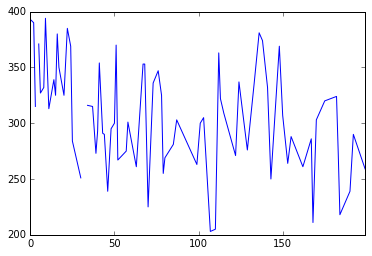

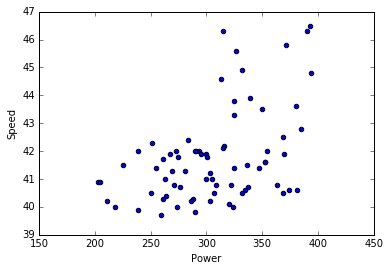

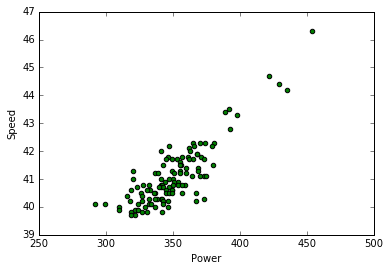

In [18]:
f = 'Power'
leaderboard[leaderboard.Powermeter.notnull()][f].plot()
plt.show()
leaderboard[leaderboard.Powermeter.notnull()].plot(kind='scatter',x=f,y='Speed')
leaderboard[leaderboard.Powermeter.isnull()].plot(kind='scatter',x=f,y='Speed',c='g')
plt.show()

In [19]:

leaderboard['Month'] = leaderboard.Date.apply(lambda x: x.month)

In [20]:
leaderboard.Month.multiply(leaderboard.index).sum()/leaderboard.index.values.sum()

7.428241206030151

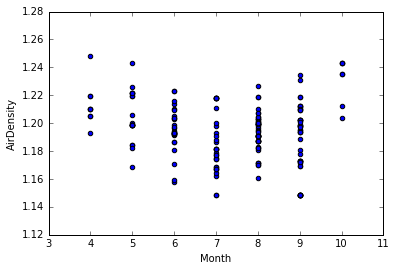

In [21]:
leaderboard.plot(kind='scatter',x='Month',y='AirDensity')

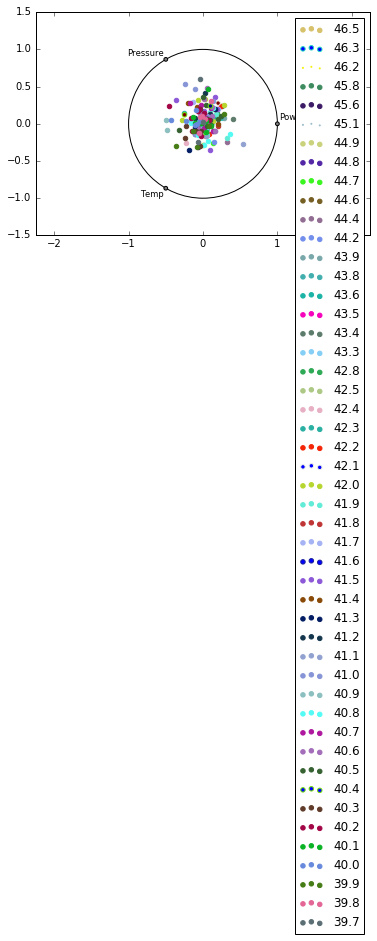

In [22]:
from pandas.tools.plotting import radviz
plt.figure()
plt.rcParams['figure.figsize'] = 20, 16
radviz(leaderboard[['Speed','Power','Pressure','Temp']], 'Speed')